In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('atlantic.csv')

In [3]:
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
#trim spaces from Name column
df['Name'] = df['Name'].str.strip()
df['Name'][0]

'UNNAMED'

In [5]:
#convert date column data to string
df['Date'] = df['Date'].apply(lambda x: str(x))

In [6]:
type(df['Date'][0])

str

In [7]:
#convert data column data from string to date time
#starting format = 18510625
from datetime import datetime

def convert_date_to_datetime(string_time):
    return datetime.strptime(string_time,'%Y%m%d')

df['year'] = df.Date.map(convert_date_to_datetime)

In [8]:
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,year
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25


In [9]:
#just want year
df['year'] = df['year'].apply(lambda x: x.year)

In [10]:
#get rid of unnamed values, hurricanes just started being named in 1950
name_mask = df['Name'] != "UNNAMED"
name_df = df[name_mask]
name_df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,year
21879,AL011950,ABLE,19500812,0,,TS,17.1N,55.5W,35,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950
21880,AL011950,ABLE,19500812,600,,TS,17.7N,56.3W,40,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950
21881,AL011950,ABLE,19500812,1200,,TS,18.2N,57.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950
21882,AL011950,ABLE,19500812,1800,,TS,19.0N,58.6W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950
21883,AL011950,ABLE,19500813,0,,TS,20.0N,60.0W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950


In [11]:
#drop duplicate hurricane name to get the just number of hurricanes per year
dup_df = name_df.drop_duplicates(subset = ['Name'], keep = 'first')
dup_df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,year
21879,AL011950,ABLE,19500812,0,,TS,17.1N,55.5W,35,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950
21930,AL021950,BAKER,19500818,1200,,TD,12.0N,54.0W,30,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950
21990,AL031950,CHARLIE,19500821,1200,,TS,11.1N,26.4W,35,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950
22051,AL041950,DOG,19500830,1800,,HU,15.2N,55.6W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950
22125,AL051950,EASY,19500901,600,,TS,19.7N,83.2W,40,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1950


In [12]:
hur_by_year = dup_df.groupby('year').Name.count().reset_index()
hur_by_year.head()

,year,Name
0,1950,13
1,1953,8
2,1954,1
3,1955,10
4,1956,7


In [13]:
import matplotlib.pyplot as plt

Text(0.5,1,'Number of Hurricanes by Year Since 1950')

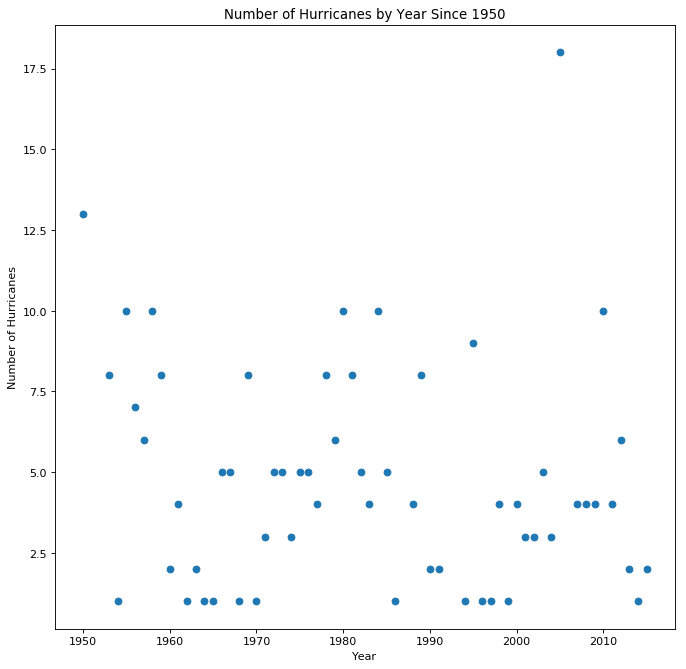

In [20]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(hur_by_year['year'], hur_by_year['Name'])
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes by Year Since 1950')

In [15]:
#create new dataframe to show highest max wind for a hurricane for each year
maxwind_year = name_df.groupby('year')['Maximum Wind'].max().reset_index()
maxwind_year

,year,Maximum Wind
0,1950,125
1,1951,130
2,1952,125
3,1953,140
4,1954,115
5,1955,150
6,1956,105
7,1957,120
8,1958,130
9,1959,115


Text(0.5,1,'Maximum Wind Speed by Year Since 1950')

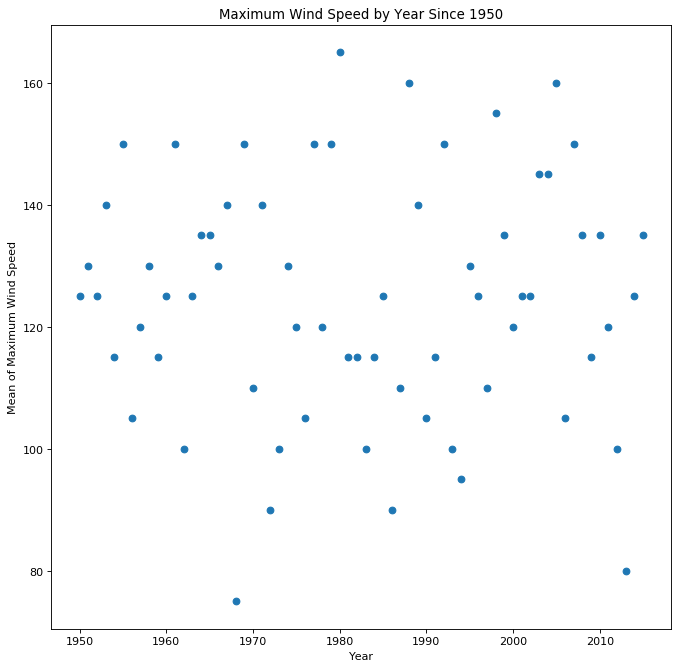

In [21]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(maxwind_year['year'], maxwind_year['Maximum Wind'])
plt.xlabel('Year')
plt.ylabel('Mean of Maximum Wind Speed')
plt.title('Maximum Wind Speed by Year Since 1950')

In [17]:
#hurricane frequency and severity has not increased, but the damage caused increased due to increased population
#plot with billion dollar disaster data